# Lecture2: Procesarea imaginilor

**De ce?**
- Îmbunătăţirea calităţii imaginilor
- Reducerea zgomotolui şi a altor defecte
- Evidenţierea anumitor zone
- Determinarea contururilor
- Extragerea de informaţii

**Aplicaţii**
- Recunoaşterea caracterelor
- Recunoaşterea amprentelor
- Prelucrarea imaginilor medicale
- Prelucrarea imaginilor din satelit

Cuprins
- [2.1. Captarea imaginilor şi reprezentarea lor](#captarea-imaginilor-şi-reprezentarea-lor)
- [2.2 Operaţii asupra imaginilor](#operaţii-asupra-imaginilor)

<a name="captarea-imaginilor-şi-reprezentarea-lor"></a>
## 2.1. Captarea imaginilor şi reprezentarea lor

### Captare
- Foto
- Video

### Reprezentare
1. În domeniul spaţial (geometric)
- Imaginea = un ansamblu de valori plasate dupa o formă spaţială (regulată sau nu) de dimensiune supra-unitară (plan, spaţiu, dar nu dreaptă)
- Matrice de pixeli (picture elemnt)
- Reprezentare intuitivă dpdv al ochiului uman


2. În domeniul frecvenţelor (spectral)
- Imaginea = un ansamblu de frecvenţe care compun imaginea (culoare – frecvenţă – lungime de undă (IP) – amplitudine)
- Imaginea = semnal bidimensional
- Grafic, pe OX, OY se află distribuţia frecvenţelor pe cele 2 axe ale imaginii, iar culoarea pixelilor va reprezenta amplitudinea (mai deschis înseamnă amplitudine superioară) 
- Reprezentare f. utilă în procesele de analiză, comprimare şi prelucrare a imaginilor

![reprezentare](images/representation.png)


### Reprezentarea in domeniul spatial

Imaginea = ansamblu de pixeli

Tipologia imaginilor în domeniul spaţial (geometric) 
1. După valoarea unui pixel
- imagini scalare – orice valoare este un scalar (intensitatea luminoasă, distanţa, temperatura)
    - imagini monocrome (binare) -> 0/1
    - imagini alb-negru (cu nivele de gri) -> 8 biţi (0 - negru, 255 - alb)

- imagini vectoriale – orice valoare este un vector; imaginea vectorială = sandwich de imagini scalare
    - imagini color – vectori de 3 componente    <img src="images/rgb.png" alt="RGB" width="300"/>

    - imagini satelitare – vectori de 3-200 componente <img src="images/satelitImg.png" alt="satelit" width="200"/>

    - imagini termografice – vectori de 2-5 componente în bandă de infraroşu     <img src="images/infrared.png" alt="infrared" width="200"/>

<a name="operatii-asupra-imaginilor"></a>
## 2.2 Operaţii asupra imaginilor

### 2.2.1. Operaţii geometrice

Info:
- Pentru reprezentarea spaţială a imaginilor
- Nu modifică valorile pixelilor (compoziţia)
- Modifică aşezarea lor spaţială (structura)

Tipuri:
- Translaţie: Modificarea după o traiectorie dreaptă a coordonatelor unui pixel   <img src="images/translation.png" alt="translation" width="200"/>

> x’ = x + Tx

> y’ = y + Ty

- Rotaţie: Modificarea după o traiectorie circulară a coordonatelor unui pixel (Coordonate carteziene $\leftarrow$ coordonate polare) <img src="images/rotation.png" alt="rotation" width="200"/>

> x = r * cos(theta)

> y = r * sin(Ө)

> x’ = r * cos(Ө + φ)

> y’ = r * sin(Ө + φ)

- Oglindire faţă de o axă de simetrie <img src="images/simmetry.png" alt="simmetry" width="200"/>




### 2.2.2. Operaţii de îmbunătăţire

- Originale sau nu
- Prin accentuarea unor caracteristici
    * Muchii
    * Contururi
    * Contrast
- Nu modifică cantitatea de informaţie din imagine
- Modificarea valorii unor pixeli
- Reducerea degradărilor perceptuale sau aleatoare:
    * Contrast scăzut
    * Imagine supra- sau sub-expusă
    * Zgomot suprapus peste semnalul util


Pentru reprezentarea spaţială avem, in funcţie de numărul de pixeli din imaginea iniţială folosiţi pentru calculul valorii unui pixel în imaginea prelucrată:
- Operaţii punctuale 1 – 1 <img src="images/pointOps.png" alt="point ops" width="200"/>
- Operaţii de vecinătate (locale) k – 1 <img src="images/localOps.png" alt="local ops" width="200"/>
- Operaţii integrale (unitare) nxm – 1 <img src="images/globalOps.png" alt="global ops" width="200"/>


1. Operaţii punctuale 1 – 1: g(x,y)=Ø(f(x,y)) <img src="images/pointOps2.png" alt="point ops" width="200"/>

- Negativarea imaginilor
    > Ø(x)=(L-1)-x, de obicei L = 256
    > Ø((R,G,B))=((L-1)-R,(L-1)-G,(L-1)-B))

    Utilitate: Imagini negative (de tip peliculă) <img src="images/inversion.png" alt="inversion" width="200"/>


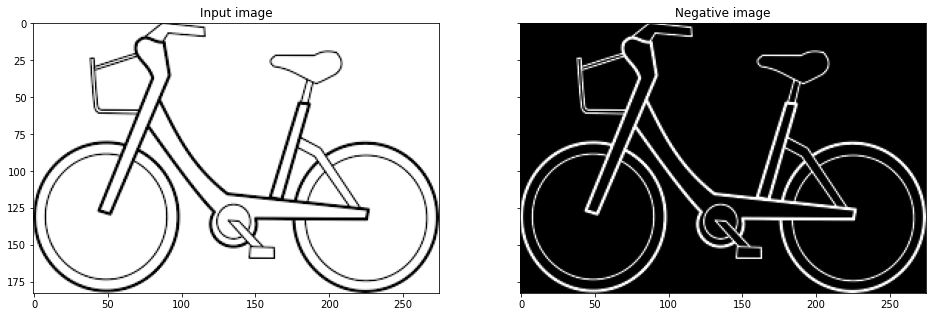

In [10]:

# negative of an image
import matplotlib.pyplot as plt
from skimage import util, io

# read an image
crtDir =  os.getcwd()
# an image with a lot of white...a bad example
# filePath = os.path.join(crtDir, 'sem1', 'bike.png')
#  an image with more uniform distributed colours
filePath = os.path.join(crtDir, 'images', 'bikeBW.png')
img = io.imread(filePath)

negImg = util.invert(img)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(negImg, cmap=plt.cm.gray)
ax2.set_title('Negative image')
plt.show()



- Modificarea contrastului

    * Liniară <img src="images/contrast.png" alt="lin contrast" width="200"/>

        - Pantă subunitară – apropierea nivelelor de gri
        - Pantă supraunitară – depărtarea nivelelor de gri
        - Caz particular: întinderea maximă a contrastului <img src="images/contrast2.png" alt="lin contrast" width="200"/>
            * Nivelele de gri din [a,b] vor fi distanţate
            * Restul nivelelor de gri vor fi înlocuite cu alb, respectiv negru
            * Caz particular: binarizarea (a = b)

    * Logaritmică Φ(x)= c log (1 + x)
        - c – factor de scalare

    * Pow-low (gamma correction) Φ(x)= c pow(x, γ)


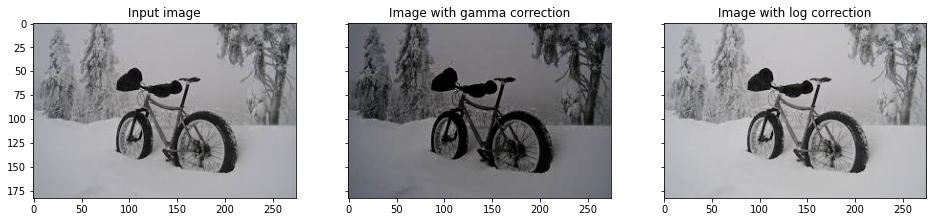

In [11]:

# contrast adjustment
from skimage import exposure

import matplotlib.pyplot as plt
from skimage import util, io

# read an image
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'images', 'bikeGray.jpg')
img = io.imread(filePath)

gammaCorrectedImg = exposure.adjust_gamma(img, 2)
logCorrectedImg = exposure.adjust_log(img, 1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(gammaCorrectedImg, cmap=plt.cm.gray)
ax2.set_title('Image with gamma correction')

ax3.imshow(logCorrectedImg, cmap=plt.cm.gray)
ax3.set_title('Image with log correction')

plt.show()



- Decuparea 

    * Cu păstrarea fundalului <img src="images/decup1.png" alt="decup" width="200"/>

    * Fără păstrarea fundalului <img src="images/decup2.png" alt="decup" width="200"/>

    > Utilitate: decuparea regiunilor de temperatură joasă reprezentate de nori din imaginile obţinute de un satelit meteo


2. Operaţii de vecinătate (locale) k – 1

În funcţie de scop:
- op. care vizează reducerea zgomotului sau a altor defecte (filtrare) -> filtre trece-jos
- op. care vizează accentuarea detaliilor (evidenţierea muchiilor, a contururilor, etc) -> filtre trece-sus

În funcţie de tip
- op. liniare -> combinaţii liniare între pixeli vecini
- op. neliniare -> combinaţii complexe între pixeli

Tehnici de filtrare
- Filtrare prin tehnica ferestrei glisante -> convoluţie bidimensională
    * Filtru = mască de filtrare (convoluţie) = formă + coeficienţi + origine = kernel
    * Convoluţie = schimbarea intensităţii unui pixel a.î. să reflecte intensitatea pixelilor vecini
- Filtrare prin estimare statistică
- Filtrare prin clustering

**Convolutii cu filtre liniare**

Ideea: noua valoare a pixelui = combinaţie liniară a mai multor pixeli din imaginea originală (principiul superpoziţiei)
> g(m,n) = ∑∑(k,l)єW wkl * f(m - k, n - l), unde 
>> W – o structură de puncte -> vecinătate, iar 
>> wkl – coeficienţii filtrului (tehnica ferestri glisante)

 <img src="images/conv2D.gif" alt="convolution" width="400"/>


In [ ]:

'''liniar filter'''

import numpy as np 

img = np.array([[7, 0, 5],
     [3, 0, 9],
     [0, 6, 8]])
kernel = np.array([[1, 1, 1], 
         [-1, -1, -1],
         [1, 1, 1]])

def convolutionOperation(image, kernel):
     # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    kernelSize = kernel.shape[0]

    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    padding = kernelSize // 2
    image_padded = np.zeros((image.shape[0] + padding * 2, image.shape[1] + padding * 2))
    image_padded[padding :-padding, padding:-padding] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y + kernelSize, x: x + kernelSize]).sum()

    return output

print(convolutionOperation(img, kernel))



Tipologie 
- Filtre de netezire
    * Suma coeficienţilor = 1
    * Filtru de mediere: Toţi coeficienţii sunt egali (=1/k2) - eg. BoxBlur, GaussianBlur
- Filtre de detectare a contururilor -> filtre trece-sus 
    * Suma coeficienţilor = 0 (eg. Canny)
    * Filtre de accentuare a contrastelor
- Filtre derivative


Text(0.5, 1.0, 'Gaussian blur (mediere ponderata)')

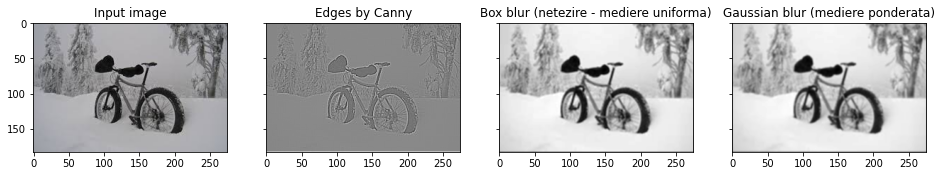

In [12]:

# read an image
crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'images', 'bikeGray.jpg')
# filePath = os.path.join(crtDir, 'images', 'bike.png')
img = io.imread(filePath)

imgMatrix = []
for i in range(0, img.shape[0]):
    row = []
    for j in range(0, img.shape[1]):
        row.append(img.item(i, j, 0))
    imgMatrix.append(row)
imgMatrix = np.array(imgMatrix)

# high-pass filter
kernelEdgeCanny = np.array([[-1, -1, -1], 
                            [-1, 9, -1], 
                            [-1, -1, -1]])
cannyImg = convolutionOperation(imgMatrix, kernelEdgeCanny)

# mean filter (new pixel's value = the average of the surrounding pixels)
kernelBoxBlur = np.array([[1/9, 1/9, 1/9], 
                          [1/9, 1/9, 1/9], 
                          [1/9, 1/9, 1/9]])
boxBlurImg = convolutionOperation(imgMatrix, kernelBoxBlur)

# Gaussian filter (new pixel's value = the weighted mean of the surrounding pixels that gives more weight to the pixel near the current pixel; low-pass filter)
kernelGaussianBlur = np.array([[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]])
GaussianBlurImg = convolutionOperation(imgMatrix, kernelGaussianBlur)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 8), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.imshow(cannyImg, cmap=plt.cm.gray)
ax2.set_title('Edges by Canny')

ax3.imshow(boxBlurImg, cmap=plt.cm.gray)
ax3.set_title('Box blur (netezire - mediere uniforma)')

ax4.imshow(GaussianBlurImg, cmap=plt.cm.gray)
ax4.set_title('Gaussian blur (mediere ponderata)')




HW: try to apply the above convolutions for an RGB image


**Convolutii cu Filtre neliniare** 

Tehnica ferestrei glisante -> ordonarea pixelilor

Tipologie
- Filtre de ordine
    * Filtru median -> eliminarea zgomotului “sare şi piper”
    * Filtru de minim 
    * Filtru de maxim
- Filtre adaptive -> modificarea formei şi a coeficienţilor ferestrei de filtrare
    * Filtre bazate pe distanţă (relativă) – coeficienţii se calculează în funcţie de distanţa dintre punctul respectiv şi un punct fix
    * Filtre bazate pe orientare -> fereastra are formă liniară, orientată după o anumită direcţie
    * Filtre distanţă-direcţie – combinaţia celor 2 filtre precedente

3. Operaţii integrale (unitare) nxm – 1

Cateva operatii posibile
- Egalizarea histogramei (Scop: manipularea contrastului)
- Transformarea Fourier discretă
- Transformarea cosinus discretă
- Transformarea sinus discretă
- Transformarea Walsh-Hadamard 
- Transformarea Karhaunen-Loeve

** Histograma nivelurilor de gri **

Ideea:
- O funcţie care asociază fiecărui nivel de gri prezent în imagine frecvenţa sa (relativă) de apariţie
- Estimarea densităţii de probabilitate

<img src="images/histo.png" alt="histogram" width="400"/>

Utilitate
- Îmbunătăţirea constrastului
- Îmbunătăţirea luminozităţii -> segmentarea imaginii
Ne-ajunsuri
- Lipsa informaţiilor privind 
    * locaţia pixelilor
    * poziţia relativă a pixelilor



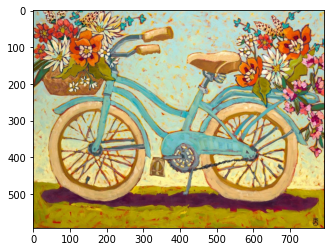

In [13]:

# image histogram

import matplotlib.pyplot as plt
from skimage import io

# read an image
crtDir =  os.getcwd()
# an image with a lot of white...a bad example
# filePath = os.path.join(crtDir, 'sem1', 'bike.png')
#  an image with more uniform distributed colours
filePath = os.path.join(crtDir, 'images', 'bike2.png')
# two images with low contrast
# filePath = os.path.join(crtDir, 'sem1', 'bike4.png')
# filePath = os.path.join(crtDir, 'sem1', 'bike5.png')
img = io.imread(filePath)
plt.imshow(img)


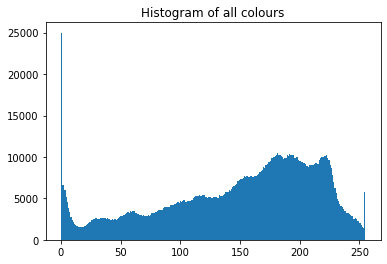

In [14]:

n, bins, patches = plt.hist(img.ravel(), bins = 256)
plt.title('Histogram of all colours')
plt.show()


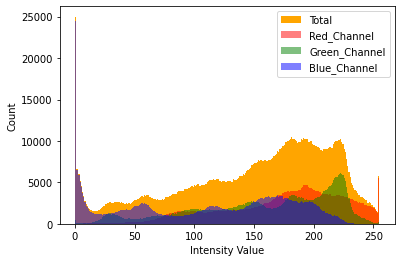

In [15]:

# histo of all pixels (a mixed of all three channels)
_ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
# histo over the red channel
_ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
# histo over the green channel
_ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
# histo over the blue channel
_ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()



Egalizarea histogramei - reprezintă o operaţie de accentuare a contrastului şi are ca scop obţinerea unei histograme uniforme

> Algoritm 
    >> Se calculează histograma h(x) imaginii
> 
    >> Se calculează histograma cumulativă hc(x)
>   
    >> Se calculează noile nivele de gri: x’=(hc(x)-hcmin)/(hcmax-hcmin)*(L-1)+0.5


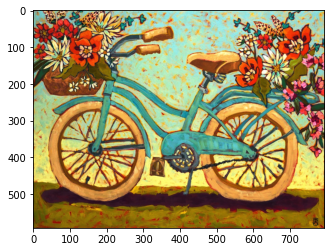

In [16]:

# histogram equalisation => increases the constrast
from skimage import exposure

imgHistoEq = exposure.equalize_hist(img)
plt.imshow(imgHistoEq)


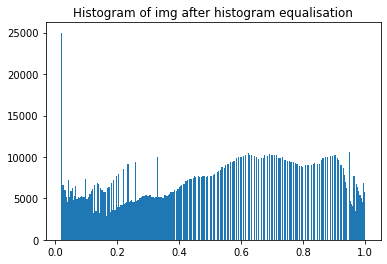

In [17]:
n, bins, patches = plt.hist(imgHistoEq.ravel(), bins = 256)
plt.title('Histogram of img after histogram equalisation')
plt.show()

### 2.2.3. Reducerea degradărilor deterministe
- Mişcare
- Lipsa focalizării
- Defecte optice

### 2.2.4 Segmentare
Descompunerea imaginii în elementele componente


### 2.2.5. Operaţii de comprimare
Reducerea volumului de date necesare reprezentării informaţiei dintr-o imagine

## Next lecture: 2.3 Extragerea de informaţii relevante din imagini
